f_P, f_Z: 3.215251375593846, 707355.302630646
f_Z1, f_P2: 2500.0, 250000.0
target crossover frequency: 25000.0
R_T: 128676.21365595073
R1, R2: 20000.0, 3809.523809523809
R3, C1, C2: 25000.0, 2.5464790894703256e-09, 3.2053805538707773e-12
18233.884130804723 -288.0123321272693


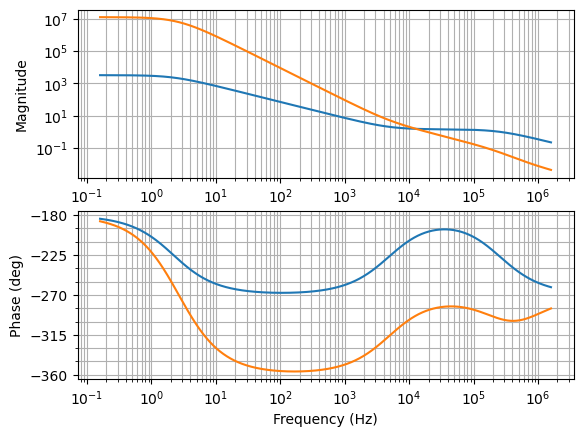

In [2]:
import control as co
import numpy as np

V_IN, V_OUT = 60, 5
D = V_OUT / V_IN
R_L, C_OUT, R_ESR = 330, 94e-6, 1.5e-3

V_ref = 0.8
f_sw = 750e+3
T = 1 / f_sw
R1 = 20e+3
R2 = R1 * V_ref / (V_OUT - V_ref)

gm_ps = 12
A_dc = gm_ps * R_L
f_P = 1 / (2 * np.pi * R_L * C_OUT)
f_Z = 1 / (2 * np.pi * R_ESR * C_OUT)
G_open = A_dc * co.tf([1 / (2 * np.pi * f_Z), 1], [1]) / co.tf([1 / (2 * np.pi * f_P), 1], [1])

A_ol, gm_ea, BW_ea = 10000, 350e-6, 2500e+3
R_O = A_ol / gm_ea
C_O = gm_ea / (2 * np.pi * BW_ea)
R3 = 25e+3
f_Z1, f_P2 = 2.5e+3, 250e+3
C1 = 1 / (2 * np.pi * f_Z1 * R3)
C2 = 1 / (2 * np.pi * f_P2 * (R3 * R_O) / (R3 + R_O)) - C_O
f_P1 = 1 / (2 * np.pi * R_O * C1)
A0 = gm_ea * R_O * R2 / (R1 + R2)
A1 = gm_ea * R_O * R3 / (R_O + R3) * R2 / (R1 + R2)
G_ea = -A0 * (1 + co.tf([1 / (2 * np.pi * f_Z1), 1], [1])) / co.tf([1 / (2 * np.pi * f_P1), 1], [1]) / co.tf([1 / (2 * np.pi * f_P2), 1], [1])

G_loop = G_open * G_ea

# mag, phase, omega = co.bode(G_comp_to_out, np.logspace(0, 7, 1000), Hz=True)
mag, phase, omega = co.bode(G_ea, np.logspace(0, 7, 1000), Hz=True)
mag, phase, omega = co.bode(G_loop, np.logspace(0, 7, 1000), Hz=True)

print('f_P, f_Z: {}, {}'.format(f_P, f_Z))
print('f_Z1, f_P2: {}, {}'.format(f_Z1, f_P2))
print('target crossover frequency: {}'.format(np.sqrt(f_Z1 * f_P2)))
print('R_T: {}'.format(101756 / ((f_sw / 1000) ** 1.008) * 1000))
print('R1, R2: {}, {}'.format(R1, R2))
print('R3, C1, C2: {}, {}, {}'.format(R3, C1, C2))

def get_crossover_state (mag, phase, omega):
  for i in range(0, len(mag) - 1):
    if not ((mag[i] >= 1 and mag[i + 1] >= 1) or (mag[i] <= 1 and mag[i + 1] <= 1)):
      return [omega[i], phase[i]]
  return [-1, -1]

crossover_state = get_crossover_state(mag, phase, omega)
print(crossover_state[0] / (2 * np.pi), crossover_state[1] * 180 / np.pi)


f_P, f_Z: 5.1307202802029455, 1128758.4616446479
f_Z1, f_P2: 2500.0, 250000.0
target crossover frequency: 25000.0
R_T: 128676.21365595073
R1, R2: 20000.0, 1428.5714285714287
R3, C1: 0.001, 0.06366197723675814
0.4542297625008858 -275.0541491400535


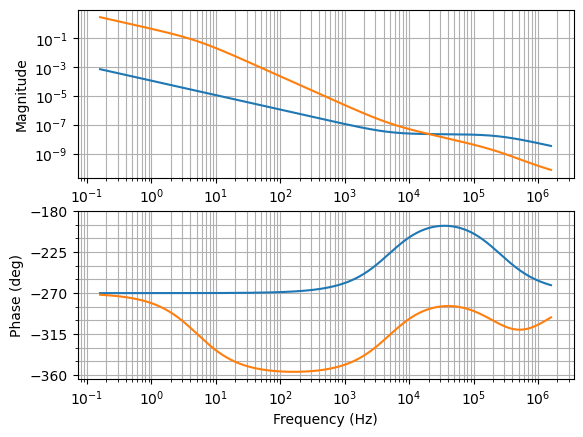

In [66]:
import control as co
import numpy as np

V_IN, V_OUT = 60, 12
D = V_OUT / V_IN
R_L, C_OUT, R_ESR = 330, 94e-6, 1.5e-3

V_ref = 0.8
f_sw = 750e+3
T = 1 / f_sw
R1 = 20e+3
R2 = R1 * V_ref / (V_OUT - V_ref)

gm_ps = 12
A_dc = gm_ps * R_L
f_P = 1 / (2 * np.pi * R_L * C_OUT)
f_Z = 1 / (2 * np.pi * R_ESR * C_OUT)
G_open = A_dc * co.tf([1 / (2 * np.pi * f_Z), 1], [1]) / co.tf([1 / (2 * np.pi * f_P), 1], [1])

A_ol, gm_ea, BW_ea = 10000, 350e-6, 2500e+3
R_O = A_ol / gm_ea
C_O = gm_ea / (2 * np.pi * BW_ea)
f_Z1, f_P2 = 2.5e+3, 250e+3
R3 = 1 / (2 * np.pi * f_P2 * R_O * C_O)
C1 = 1 / (2 * np.pi * f_Z1 * R3)
f_P1 = 1 / (2 * np.pi * R_O * C1)
A0 = gm_ea * R_O * R2 / (R1 + R2)
A1 = gm_ea * R_O * R3 / (R_O + R3) * R2 / (R1 + R2)
G_ea = -A0 * (1 + co.tf([1 / (2 * np.pi * f_Z1), 1], [1])) / co.tf([1 / (2 * np.pi * f_P1), 1], [1]) / co.tf([1 / (2 * np.pi * f_P2), 1], [1])

G_loop = G_open * G_ea

# mag, phase, omega = co.bode(G_comp_to_out, np.logspace(0, 7, 1000), Hz=True)
mag, phase, omega = co.bode(G_ea, np.logspace(0, 7, 1000), Hz=True)
mag, phase, omega = co.bode(G_loop, np.logspace(0, 7, 1000), Hz=True)

print('f_P, f_Z: {}, {}'.format(f_P, f_Z))
print('f_Z1, f_P2: {}, {}'.format(f_Z1, f_P2))
print('target crossover frequency: {}'.format(np.sqrt(f_Z1 * f_P2)))
print('R_T: {}'.format(101756 / ((f_sw / 1000) ** 1.008) * 1000))
print('R1, R2: {}, {}'.format(R1, R2))
print('R3, C1: {}, {}'.format(R3, C1))

def get_crossover_state (mag, phase, omega):
  for i in range(0, len(mag) - 1):
    if not ((mag[i] >= 1 and mag[i + 1] >= 1) or (mag[i] <= 1 and mag[i + 1] <= 1)):
      return [omega[i], phase[i]]
  return [-1, -1]

crossover_state = get_crossover_state(mag, phase, omega)
print(crossover_state[0] / (2 * np.pi), crossover_state[1] * 180 / np.pi)
